In [27]:
%load_ext autoreload
%autoreload 
%aimport CustomFunctions
cufu = CustomFunctions

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from datetime import datetime as dt 
#import CustomFunctions as cufu


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load information about different gas stations and price development from csv files
stations = pd.read_csv("example_sprit_cut_station.csv", delimiter=";")
prices = pd.read_csv("example_sprit_cut_prices.csv", delimiter=";")

  

In [29]:
# How many differnt brands exist in the data set?
# Let all brands be in the same format to not get the same brand with different spelling
stations[["BRAND"]] = stations[["BRAND"]].applymap(cufu.format_text)

brands = stations[["BRAND"]].values
unique_brands = stations.BRAND.unique()
print("num different brands: " + str(unique_brands.shape[0]))



num different brands: 51


In [30]:
# What is the existing history in days?
brands = stations.groupby("BRAND")
# get current time
now = dt.now()
dict = {}
for key, item in brands:
    brand_ids = brands.get_group(key)["ID"]
    rows_idx = prices["STID"].isin(brand_ids)
    time_stamps = prices.loc[rows_idx]["DATE_CHANGED"]
    time = time_stamps.apply(cufu.time_stamp_to_date)
    min_time = time.min()
    days = (now-min_time).days
    dict[key] = days


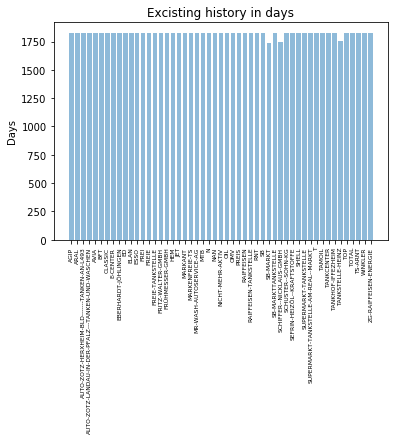

In [34]:
y_pos = np.arange(len(dict.keys()))
plt.bar(y_pos, dict.values(), align='center', alpha=0.5)    #, width=10)
plt.xticks(y_pos, dict.keys())
plt.ylabel('Days')
plt.title('Excisting history in days')
plt.xticks(fontsize=6, rotation=90)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%4.0f'))
plt.show()


In [6]:
# What is the min, mean, max price for each gasoline type weekly (time series graph)
prices_week = prices.copy()
prices_week["DATE_CHANGED"] = prices_week["DATE_CHANGED"].apply(cufu.time_stamp_to_week)

grouped_week = prices_week.groupby("DATE_CHANGED")
dict_e5 = {}
dict_e10 = {}
dict_diesel = {}

for week, item in grouped_week:
    current_group = grouped_week.get_group(week)
    min_e5 = cufu.get_min(current_group["E5"], 10)/1000
    min_e10 = cufu.get_min(current_group["E10"], 10)/1000
    min_diesel = cufu.get_min(current_group["DIESEL"], 10)/1000
    
    max_e5 = cufu.get_max(current_group["E5"], 8000)/1000
    max_e10 = cufu.get_max(current_group["E10"], 8000)/1000
    max_diesel = cufu.get_max(current_group["DIESEL"], 8000)/1000
    
    mean_e5 = cufu.get_mean(current_group["E5"], 10, 8000)/1000
    mean_e10 = cufu.get_mean(current_group["E10"], 10, 8000)/1000
    mean_diesel = cufu.get_mean(current_group["DIESEL"], 10, 8000)/1000
    
    dict_e5[week] = [min_e5, mean_e5, max_e5]
    dict_e10[week] = [min_e10, mean_e10, max_e10]
    dict_diesel[week] = [min_diesel, mean_diesel, max_diesel]



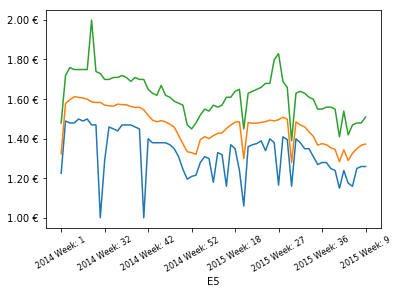

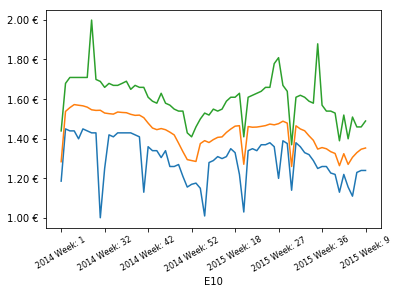

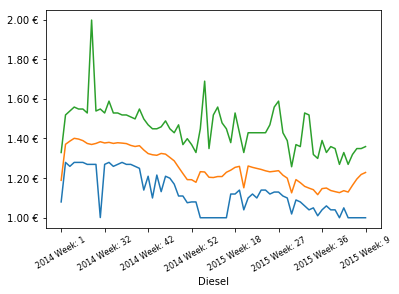

In [7]:
x_index_list, x_label_list = cufu.generate_plt_ticks(8, list(dict_e5.keys()))
plt.xticks(x_index_list, x_label_list)
plt.plot(dict_e5.keys(), dict_e5.values())
plt.xlabel("E5")
plt.xticks(fontsize=8, rotation=30)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f €'))
plt.show()

x_index_list, x_label_list = cufu.generate_plt_ticks(8, list(dict_e5.keys()))
plt.xticks(x_index_list, x_label_list)
plt.plot(dict_e10.keys(), dict_e10.values())
plt.xlabel("E10")
plt.xticks(fontsize=8, rotation=30)  
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f €'))
plt.show()

x_index_list, x_label_list = cufu.generate_plt_ticks(8, list(dict_e5.keys()))
plt.xticks(x_index_list, x_label_list)
plt.plot(dict_diesel.keys(), dict_diesel.values())
plt.xlabel("Diesel")
plt.xticks(fontsize=8, rotation=30)  
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f €'))
plt.show()


In [8]:
# What is cheapest station (in average), why is it the cheapest
import math
id_prices_group = prices.groupby("STID")
min_average = 10000
min_id = 0
max_average = 0
max_id = 0
for id, item in id_prices_group:
    current_group = id_prices_group.get_group(id)
    mean_e5 = (current_group[["E5"]][current_group[["E5"]] > 0]).mean().values[0]
    mean_e10 = (current_group[["E10"]][current_group[["E10"]] > 0]).mean().values[0]
    mean_diesel = (current_group[["DIESEL"]][current_group[["DIESEL"]] > 0]).mean().values[0]

    if not (math.isnan(mean_e5) or math.isnan(mean_e10) or math.isnan(mean_diesel)):
        average = (mean_e5+mean_e10+mean_diesel)/3
        if average < min_average:
            min_average = average
            min_id = id
        if average > max_average:
            max_average = average
            max_id = id
            
print("min_average: %1.2f" % (float(min_average)/1000.) + " €")
station_min = stations.loc[stations['ID'] == min_id]
print("at station: " + str(station_min["NAME"].values[0]) + " " + str(station_min["STREET"].values[0]) + " " + str(station_min["HOUSE_NUMBER"].values[0]) + " " + str(station_min["POST_CODE"].values[0]) + " " + str(station_min["PLACE"].values[0]))

print("max_average: %1.2f" % (float(max_average)/1000.) + " €")
station_max = stations.loc[stations['ID'] == max_id]
print("at station: " + str(station_max["NAME"].values[0]) + " " + str(station_max["STREET"].values[0]) + " " + str(station_max["HOUSE_NUMBER"].values[0]) + " " + str(station_max["POST_CODE"].values[0]) + " " + str(station_max["PLACE"].values[0]))


min_average: 1.28 €
at station: Winkler-Kaiserslautern Mainzerstraße 110 67657 Kaiserslautern
max_average: 1.49 €
at station: BAT WATTENHEIM - A6 An der A 6 nan 67319 Wattenheim


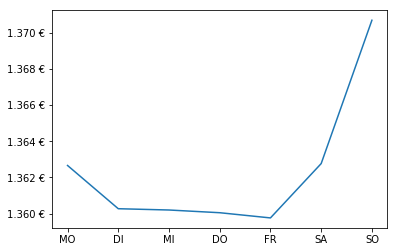

In [22]:
# At which day of a weak is the price most likely the cheapest (week profile)
prices_weekday = prices.copy()
prices_weekday["DATE_CHANGED"] = prices_weekday["DATE_CHANGED"].apply(cufu.time_stamp_to_weekday)
weekday_means = prices_weekday.groupby("DATE_CHANGED").mean()
min_average = (weekday_means["E5"] + weekday_means["E10"] + weekday_means["DIESEL"])/3000.
weekdays = ["MO", "DI", "MI", "DO", "FR", "SA", "SO"]
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.3f €'))
plt.plot(weekdays, min_average)
plt.show()


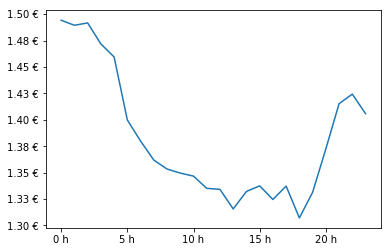

In [23]:
# At which hour during a day is the price the cheapest (hour profile)
prices_hour = prices.copy()
prices_hour["DATE_CHANGED"] = prices_hour["DATE_CHANGED"].apply(cufu.time_stamp_to_hour)
hour_groups = prices_hour.groupby("DATE_CHANGED")
hour_means = hour_groups.mean()
min_average = (hour_means["E5"] + hour_means["E10"] + hour_means["DIESEL"])/3000.
plt.plot(hour_groups.groups.keys(), min_average)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f €'))
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.0f h'))
plt.show()


In [32]:
# How many different locations are present in the data (visualize via a map)
from mpl_toolkits.basemap import Basemap

places_group = stations.groupby("PLACE")
number_places = places_group.ngroups
print("Number of different locations (cities): " + str(number_places))
place_dict = {}
for place, item in places_group:
    current_place = places_group.get_group(place)
    lat = current_place["LAT"].iloc[0]
    lng = current_place["LNG"].iloc[0]
    place_dict[place] = [lat, lng]
    

Number of different locations (cities): 198


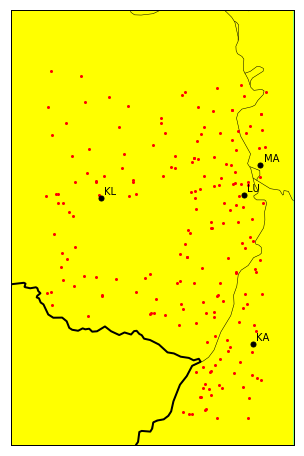

In [33]:
plt.figure(figsize=(14,8))
map = Basemap(llcrnrlon=7.4,llcrnrlat=48.7,urcrnrlon=8.6,urcrnrlat=50, resolution = 'h', epsg=5243)
map.drawcountries(linewidth=2)
map.drawrivers()
# Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')
# Fill the continents with the land color
map.fillcontinents(color='yellow',lake_color='aqua')
map.drawcoastlines()

for key, value in place_dict.items():
    cufu.draw_city(key, value[0], value[1], map)

plt.show()


AVIA Phillipsburg


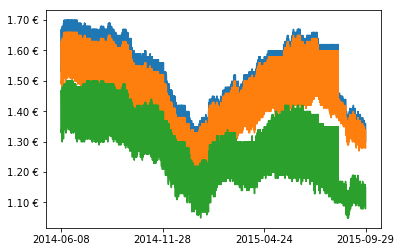

In [27]:
# What is the gas station which has most price data points, choose one and draw the time series for all 3 gas types
max_data_points = prices.groupby('STID')["DATE_CHANGED"].count().sort_values().tail(1)
number_data_points = max_data_points.values[0]
id_max_data_points = max_data_points.index.values[0]
name_max_station = stations.loc[stations['ID'] == id_max_data_points]["NAME"].tail(1).values[0]
print(name_max_station)
data_points = prices.loc[prices["STID"] == id_max_data_points].sort_values('DATE_CHANGED')
data_points[["E5", "E10", "DIESEL"]] = data_points[["E5", "E10", "DIESEL"]]/1000.
E5 = data_points["E5"].values
E10 = data_points["E10"].values
Diesel = data_points["DIESEL"].values
Date = data_points["DATE_CHANGED"].apply(lambda x: x.split(" ")[0])

plt.plot(E5)
plt.plot(E10)
plt.plot(Diesel)
x_index_list, x_label_list = cufu.generate_plt_ticks(4, list(Date))
plt.xticks(x_index_list, x_label_list)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f €'))
plt.show()


Max hour changes: 0.88 at: 12 o'clock


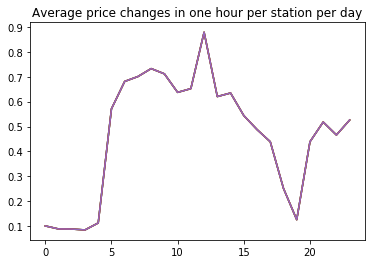

In [28]:
# At which hour during the day do we have the most price changes?
hour_changes = hour_groups.count().sort_values(by="DATE_CHANGED")
unique_ids = prices.STID.unique().shape[0]
num_days = prices["DATE_CHANGED"].apply(cufu.time_stamp_to_day).unique().shape[0]
hour_changes = hour_changes/(unique_ids*num_days)
max_hour_changes = hour_changes["CHANGED"].max()
max_hour_changes_id = hour_changes["CHANGED"].idxmax()
print("Max hour changes: %1.2f" % max_hour_changes + " at: " + str(max_hour_changes_id) + " o'clock")
plt.title("Average price changes in one hour per station per day")
plt.plot(hour_changes.values)
plt.show()


c:\users\jonas\exercise\venv_37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


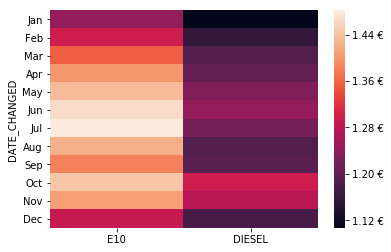

In [29]:
# Select 20 gas stations having the longest time history and visualize the average
# price per month. Use heatmap and only the prices between 12:00-13:00 of e10
# and diesel.
import seaborn as sns

long_hist_ids = prices.sort_values(by="DATE_CHANGED").head(20)["STID"]
prices_12_13 = prices.loc[prices["DATE_CHANGED"].apply(cufu.between_12_13)]
stations_20_prices_12_13 = prices_12_13.loc[prices_12_13["STID"].isin(long_hist_ids)]
stations_20_prices_12_13["DATE_CHANGED"] = stations_20_prices_12_13["DATE_CHANGED"].apply(cufu.time_stamp_to_month)

month_means = stations_20_prices_12_13.groupby("DATE_CHANGED")["E10", "DIESEL"].mean()/1000.
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.heatmap(month_means, cbar_kws={'format': '%1.2f €'}, yticklabels=month_names)


In [30]:
# Describe	a	possible	business	potential in € for	the	customer (textual	description	
# in	the	ipyhton	file).	Define	the	constraints	of	the	business case 5 lines,	the	
# answer	max	15 lines (high	level summary)

# Do	we	have	an added	value	for	the company	by	knowing	more about	the	gas	
# prices?


# A company with a large car fleet like in this case could have an added value by knowing more
# about the gas prices.
# They could try to fill up the fuel on the weekday the price is the cheapest.
# Also they could refuel with respect to the time of the day.
# Another good thing would be to know the cheapest gas station in the region.
# 
# We can see that the daily hour has more influence on the gas price (1.50 € to 1.31 €) than the day (1.36 € to 1.37 €)
# So we can save around 20 Cents per Liter if refuel at the correct hour of the day (around 18:00 o'clock)
# If we refuel a 50 Liter gas tank of one car once a week we can save 5 € per car per week. 
# 
# The cheapest station has an average price of 1.28 € and the most expensive one has an average price of 1.49 €.
# So there we have also a high potential of saving some money. 
#
# Of course there are different constraints in those cases. 
# The company has in reach of a cheap gas station. If this is not the gase we have to find a tradoff between distance and price.
# At long tours the company may not be able to access a station that is cheap, but have to take one next to the highway.
# Also the company may not be able to refuel at the cheapest hour every time,
# because there may be no one working anymore, the same applies to the weekday.




Max :7
